In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [13]:
df = pd.read_csv('dhaka homeprices.csv')
df

,area,price
0,2600,55000
1,3000,56500
2,3200,61000
3,3600,68000
4,4000,72000
5,5000,71000
6,2500,40000
7,2700,38000
8,1200,17000
9,5000,100000


In [14]:
df.head(6)

,area,price
0,2600,55000
1,3000,56500
2,3200,61000
3,3600,68000
4,4000,72000
5,5000,71000


In [15]:
df.shape

(10, 2)

In [16]:
df.isnull().any()

area     False
price    False
dtype: bool

In [17]:
df.isnull().sum()

area     0
price    0
dtype: int64

# Plot

[]

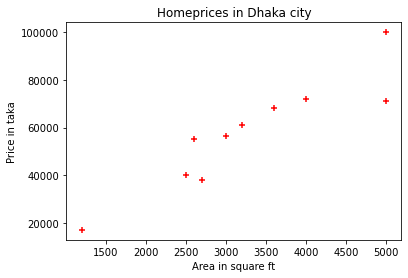

In [53]:
plt.xlabel('Area in square ft')
plt.ylabel('Price in taka')
plt.scatter(df['area'], df['price'],color='red', marker='+')
plt.title('Homeprices in Dhaka city')
plt.plot()

# Separate dependent and independent variable

In [25]:
x = df[['area']]
y = df['price']
x

,area
0,2600
1,3000
2,3200
3,3600
4,4000
5,5000
6,2500
7,2700
8,1200
9,5000


In [26]:
y

0     55000
1     56500
2     61000
3     68000
4     72000
5     71000
6     40000
7     38000
8     17000
9    100000
Name: price, dtype: int64

# Split Data set

In [33]:
from sklearn.model_selection import train_test_split 

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state =1)

xtest

,area
2,3200
9,5000
6,2500


In [29]:
xtrain

,area
4,4000
0,2600
3,3600
1,3000
7,2700
8,1200
5,5000


# Fitting Multiple Linear Regression to the Training set

In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [36]:
regressor.fit(xtrain, ytrain)

LinearRegression()

In [37]:
regressor.predict(xtest)

array([54577.95521897, 81852.07441554, 43971.35330919])

In [38]:
regressor.predict([[3500]])

array([59123.64175173])

# Just Checking Value Predicted Value

In [40]:
a = regressor.intercept_
b = regressor.coef_

# As, Y = MX + C , x = 3500

In [42]:
y = b*3500 + a
y

array([59123.64175173])

# ( y == regressor.predict([[3500]]) )
Best fit line

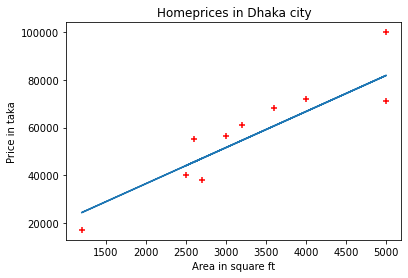

In [54]:
plt.xlabel('Area in square ft')
plt.ylabel('Price in taka')
plt.scatter(df['area'], df['price'],color='red', marker='+')
plt.title('Homeprices in Dhaka city')
plt.plot(df.area,regressor.predict(df[['area']]))

In [49]:
regressor.score(xtest,ytest)

0.7916065214158408

# R2 Value

In [50]:
from sklearn.metrics import r2_score
pred = regressor.predict(xtest)

In [55]:
score=r2_score(ytest,pred)